### libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.model_selection import train_test_split

In [229]:
%run SVRM_LS_Library.ipynb

### Derivation

$$ 
\begin{equation}
\left( \Omega + \Upsilon_{\Gamma} \right)\alpha + b\mathbf{1}_v = \mathbf{y}
\end{equation}
$$

$$
\begin{equation}
\mathbf{1}_v^T \alpha = 0
\end{equation}
$$

-----------------------------------------------------------------------------------------------------------

$$
\begin{equation}
\alpha = \Omega^{-1}\left(y - \mathbf{1}b\right)
\end{equation}
$$

$$
\begin{equation}
b = \left( \mathbf{1}^T \Omega^{-1} \mathbf{1} \right)^{-1}\mathbf{1}^T \Omega^{-1} \mathbf{y}
\end{equation}
$$

### Random blobs

#### linear 2 dimensional 

In [79]:
from sklearn.datasets import make_blobs

In [80]:
# create random X and y
X, y = make_blobs(centers = 2, random_state = 2, n_features = 2, cluster_std = 1);
# y = np.where(y == 1, 1, -1)

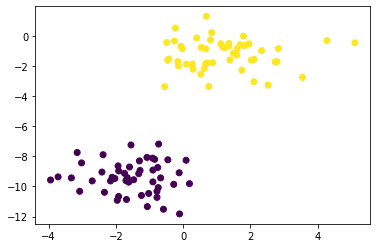

In [81]:
plott.scatter(X, y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 20, 
                                                    shuffle = True)

In [83]:
model = SVRM_LS(C = 0.1).fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# coefficients
w, b = model.coef_()

In [84]:
b

1.1221124678896122

In [85]:
np.unique(y_train)

array([0, 1])

f"Score: {np.mean(np.abs((y_pred - y_test)/y_test))*100} %"

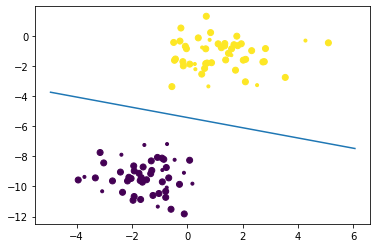

In [89]:
# two features
# utilss.contour_plot(X_train, y_train)
plott.scatter(X_train, y_train)
plott.scatter(X_test, y_pred, m = ".")
plott.line(X, w, b)

#### linear 2 dimensional combined

In [129]:
# create random X and y
X, y = make_blobs(centers = 2, random_state = 2, n_features = 2, cluster_std = 5);

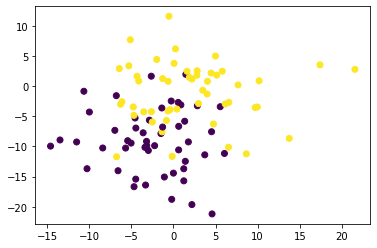

In [130]:
plott.scatter(X, y)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 20, 
                                                    shuffle = True)

In [133]:
model = SVRM_LS(C = 0.1).fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# coefficients
w, b = model.coef_()

In [134]:
f"Score: {np.mean(np.abs(y_pred - y_test))*100} %"

'Score: 40.0 %'

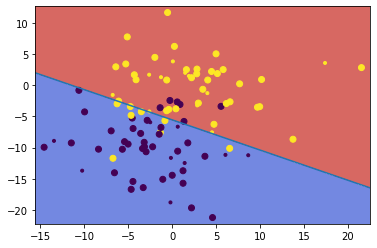

In [135]:
# two features
utilss.contour_plot(X_train, y_train)
plott.scatter(X_train, y_train)
plott.scatter(X_test, y_pred, m = ".")
plott.line(X, w, b)

#### rbf 2 dimensional

In [230]:
from sklearn.datasets import make_blobs

In [87]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [247]:
X, y = make_blobs(centers = 4, random_state = 2, n_samples=200,)
y = np.where(y == 2, 1, -1)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 50, random_state = 1)

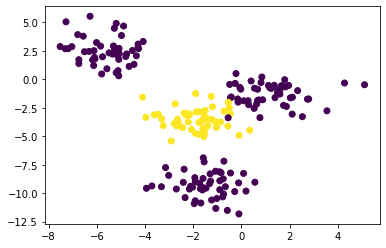

In [249]:
plott.scatter(X, y)

In [282]:
model = SVRM_LS(C = 0.001, kernel= "poly").fit(X_train, y_train)

In [283]:
# X_test = utilss.X_random(X, n_predict = 100)

In [284]:
y_predict = model.predict(X_test)

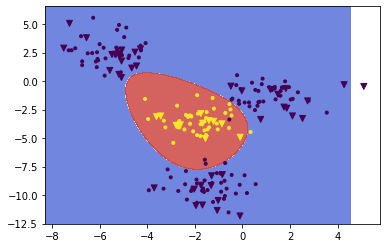

In [285]:
# contour plot
utilss.contour_plot(X_train, y_train, kernel = "poly", C = 0.001)
# prediction
plott.scatter(X_test, y_predict, m="v")
# real values
plott.scatter(X_train, y_train, m=".")